In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import SVC

### Generate one dimensional data

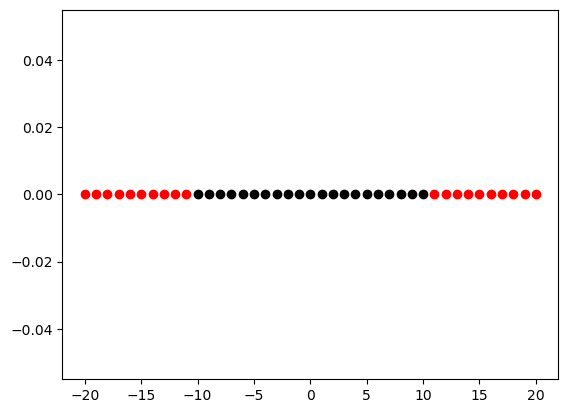

In [2]:
bound = 20

x_init = np.arange(start= -bound, stop= bound+1, step= 1)
x_init = np.c_[x_init, [0] * x_init.shape[0]]

n_ele = len(x_init)
class0 = np.repeat(0, (n_ele - 1) / 4)
class1 = np.repeat(1, ((n_ele - 1) / 2) + 1)


temp = \
np.c_[x_init, np.concatenate([class0, class1, class0])]

mapping = {0:'red', 1:'black'}



for i in range(len(temp[:, 0])):
    plt.scatter(x= temp[i, 0], y= temp[i, 1], color= mapping[temp[i, 2]])

### Similarity Metric
#### Use the x values to represent distances from another point of interest on the x-axis
When distance is zero, perfectly similar.  When distance is infinite, perfectly unsimilar.
## $\phi(\gamma, d) = e^{-\gamma d^2}$
## $\gamma = \frac{1}{2\sigma^2}$

### Varying $\gamma$ allows smaller distances to be considered or removed

In [3]:
landmark1 = -4
landmark2 = 11

In [4]:
def phi(g, x, l): 
    return np.exp(-g * (x - l)**2)

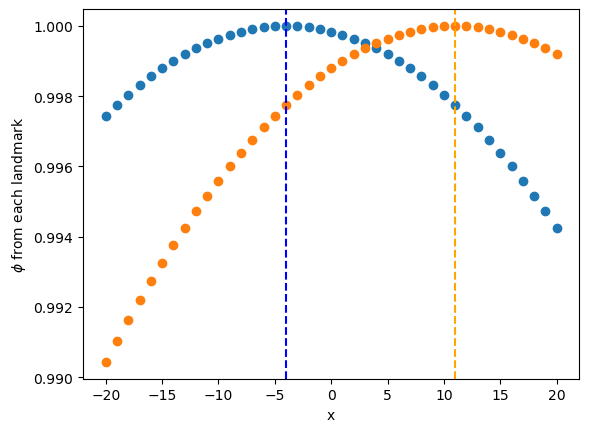

In [5]:
plt.scatter(x= temp[:,0], y= phi(g= 0.00001, x= temp[:, 0], l = landmark1))
plt.scatter(x= temp[:,0], y= phi(g= 0.00001, x= temp[:, 0], l = landmark2))
plt.axvline(x= landmark1, color= 'blue', linestyle= '--')
plt.axvline(x= landmark2, color= 'orange', linestyle= '--')
plt.xlabel('x')
plt.ylabel('$\phi$ from each landmark')
plt.show()

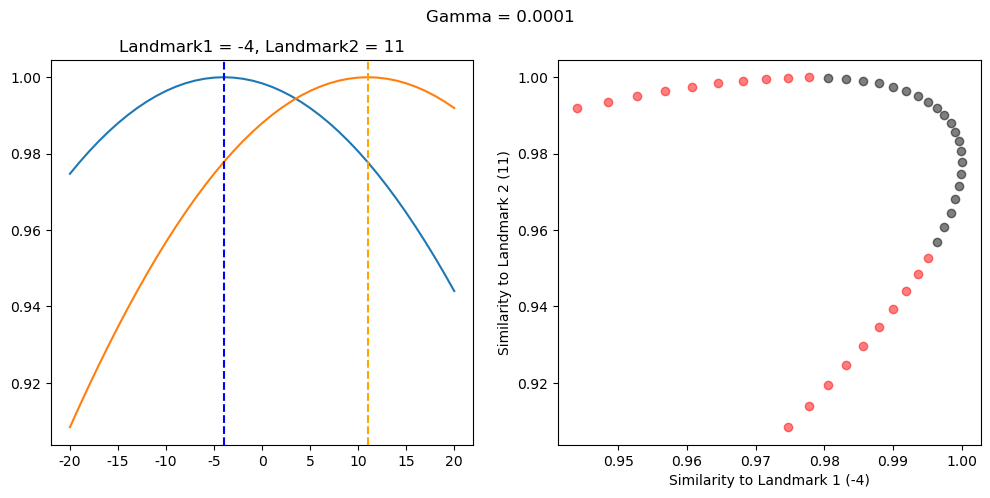

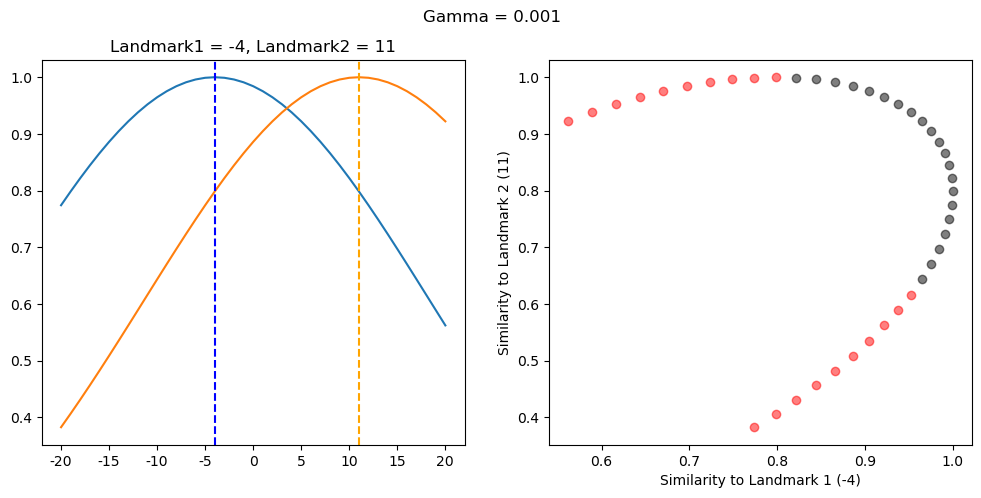

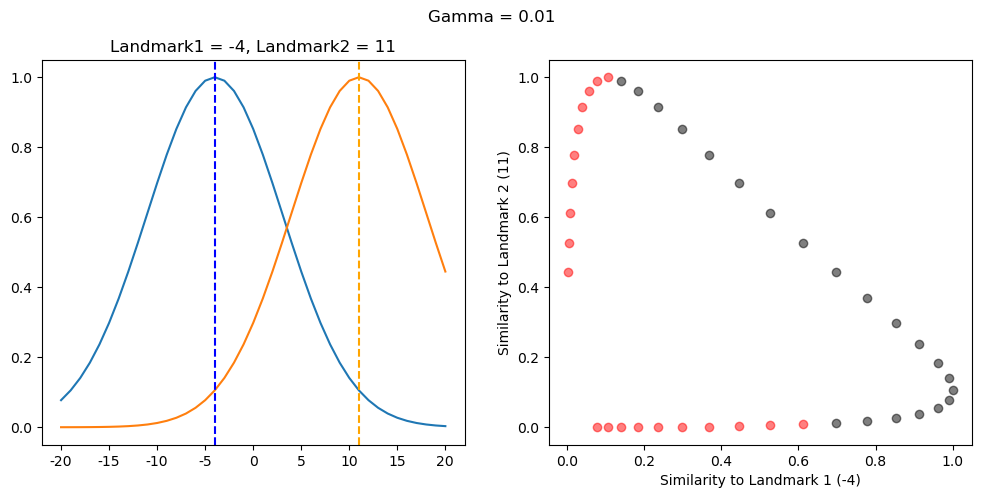

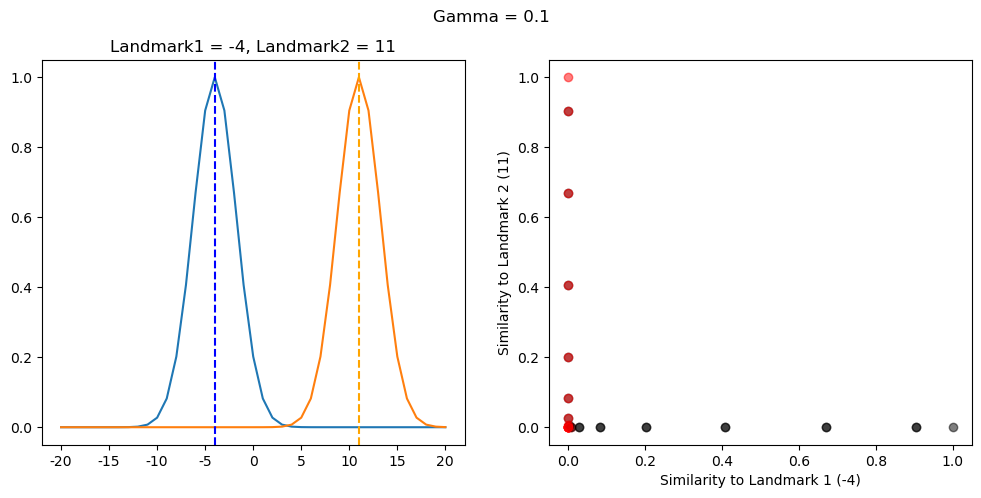

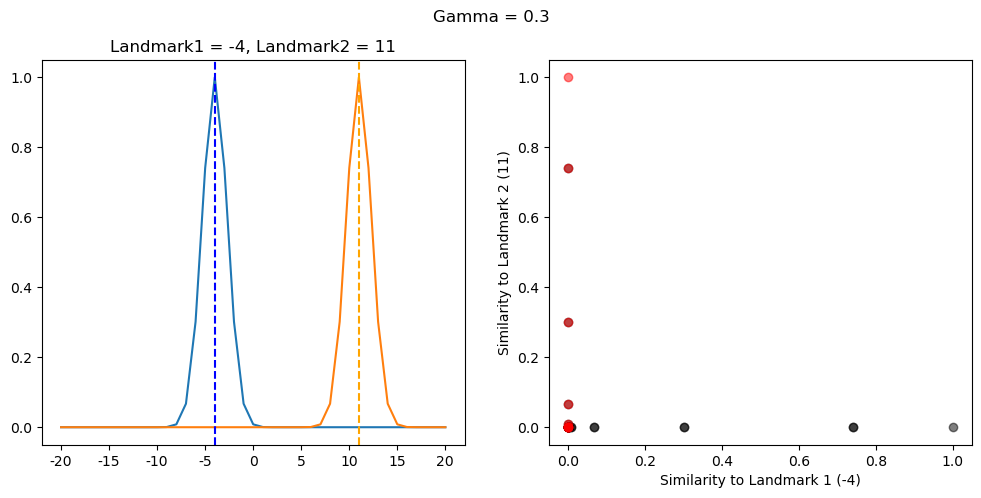

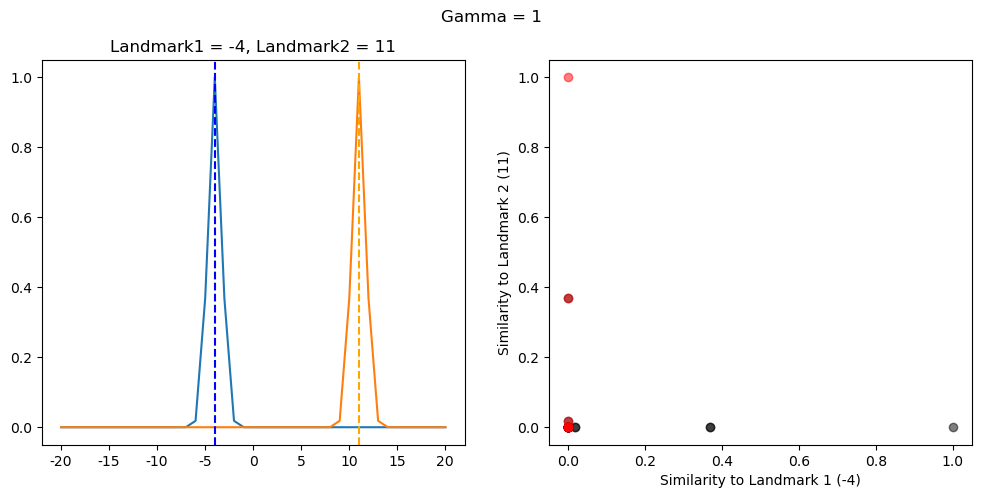

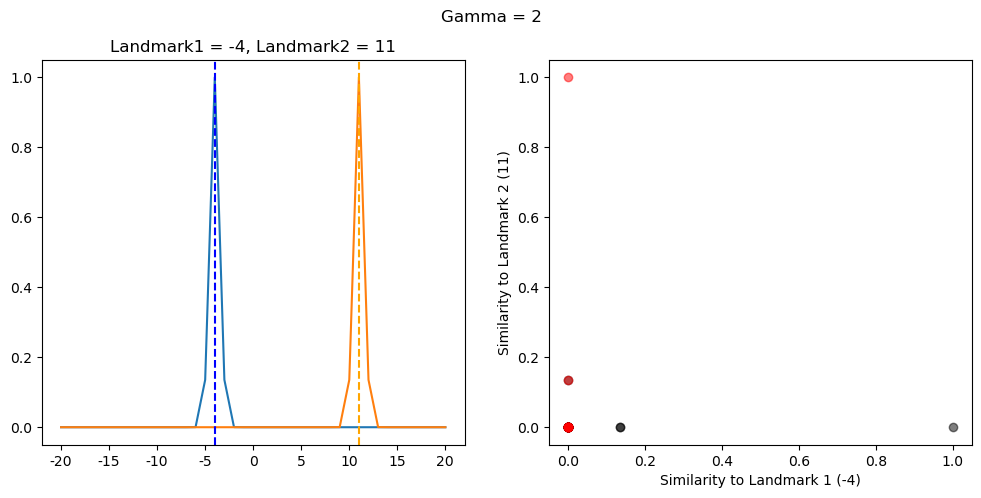

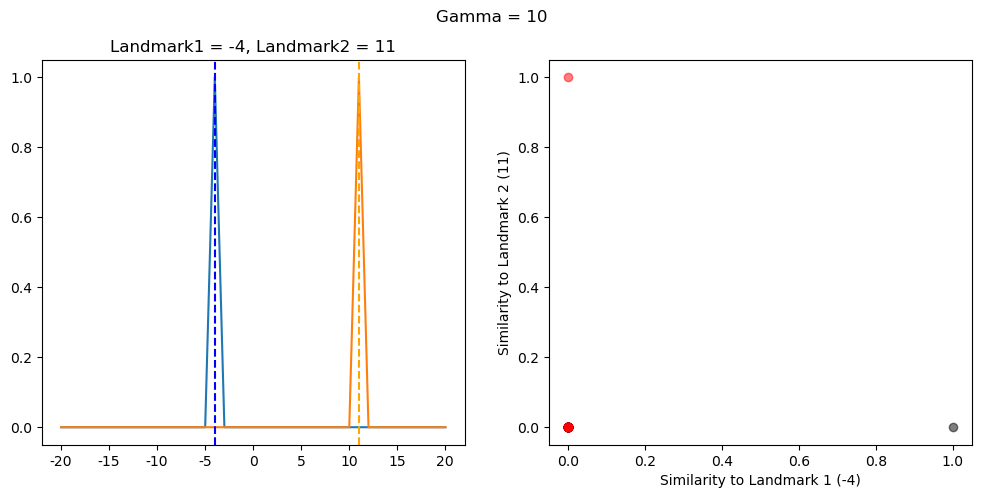

In [6]:
for gamma in [0.0001, 0.001, 0.01, 0.1, 0.3,  1, 2, 10]:
    x = phi(g= gamma, x= temp[:, 0], l= landmark1)
    y = phi(g= gamma, x= temp[:, 0], l= landmark2)

    fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (12, 5))

    ax1.plot(x)
    ax1.plot(y)
    ax1.set_xticks(np.arange(start= 0, stop= len(temp[:, 0] - landmark1), step = 5))
    ax1.set_xticklabels(labels= (temp[:, 0][0::5]).astype('str'))
    ax1.axvline(x= x.argmax(), c= 'blue', linestyle= '--')
    ax1.axvline(x= y.argmax(), c= 'orange', linestyle= '--')
    ax1.set_title(f'Landmark1 = {landmark1}, Landmark2 = {landmark2}')

    for i in range(len(x)):
        ax2.scatter(x= x[i], y= y[i], color= mapping[temp[i, 2]], alpha= 0.5)
        ax2.set_xlabel(f'Similarity to Landmark 1 ({landmark1})')
        ax2.set_ylabel(f'Similarity to Landmark 2 ({landmark2})')
    fig.suptitle(f'Gamma = {gamma}')
    plt.show()

In [7]:
c_range = [0.1, 1, 10]
gamma_range = np.logspace(start= -3, stop= 1, num= 5)
classifiers = []
for g in gamma_range:
    for c in c_range:
        svm = SVC(kernel = 'rbf', gamma= g, C= c)
        svm.fit(X= temp[:, :2], y= temp[:, 2])
        classifiers.append((c, g, svm))

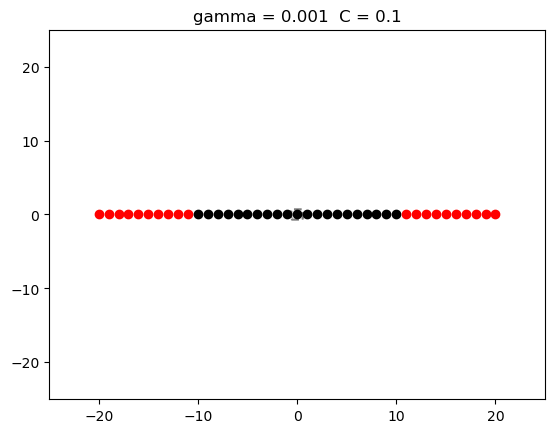

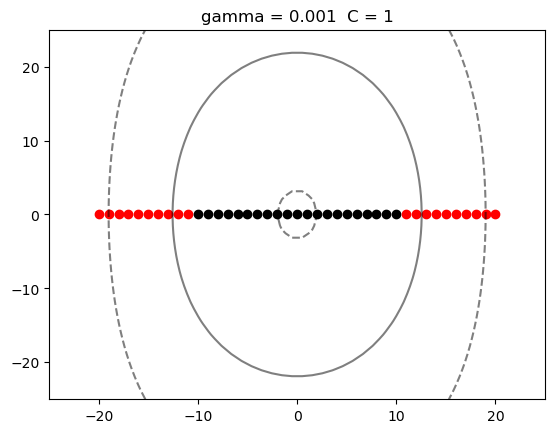

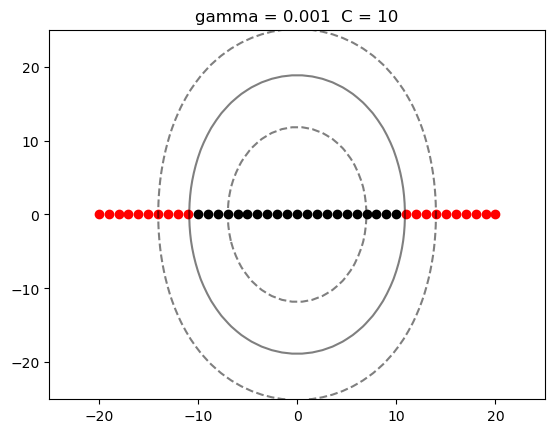

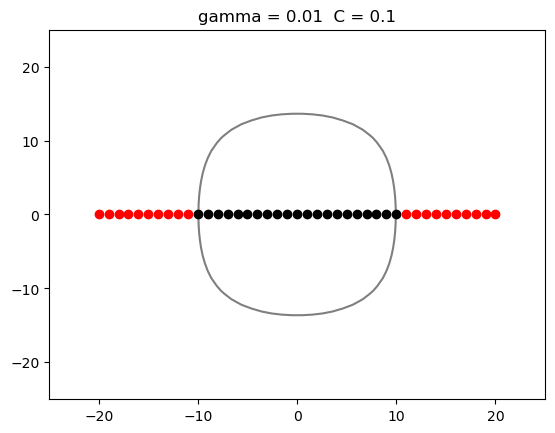

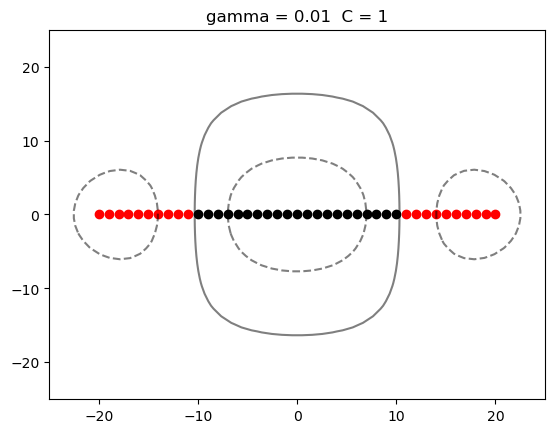

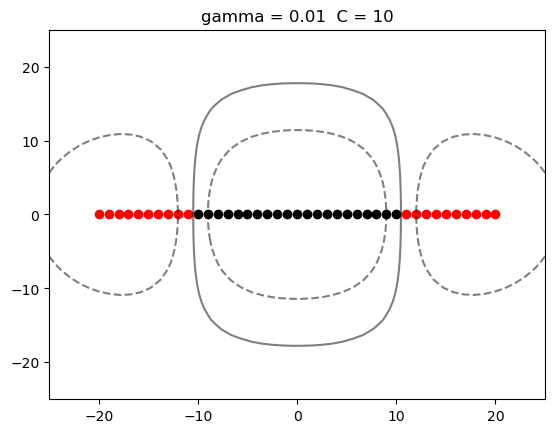

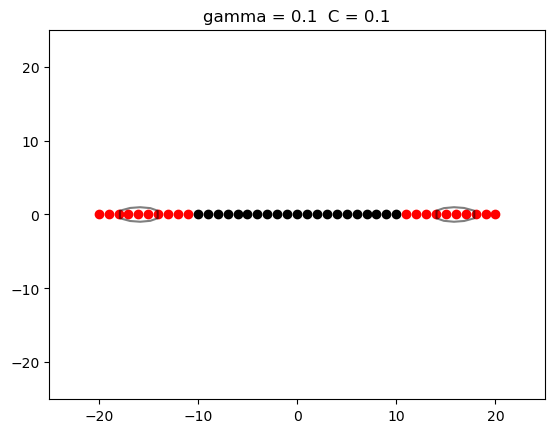

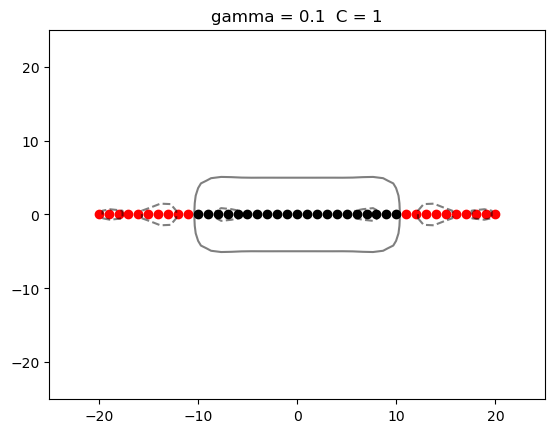

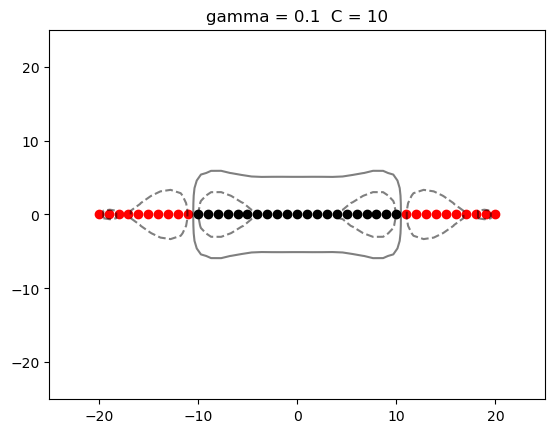

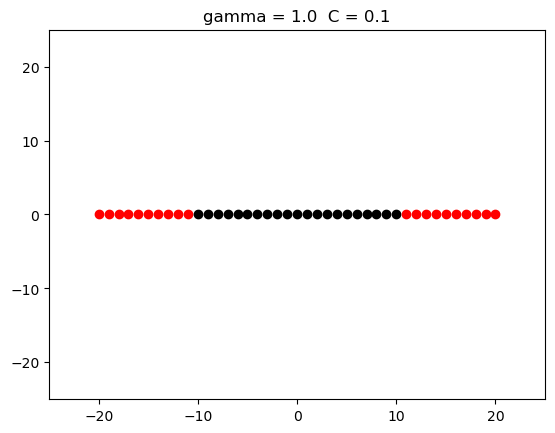

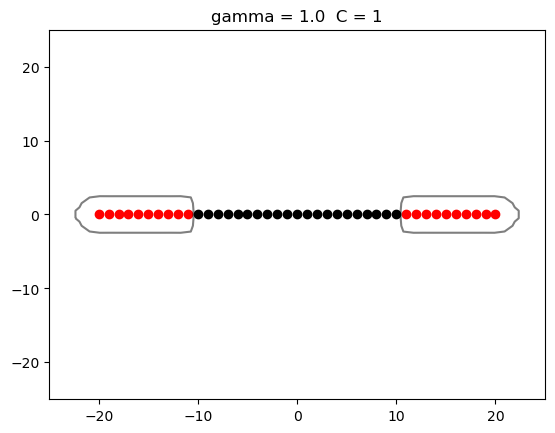

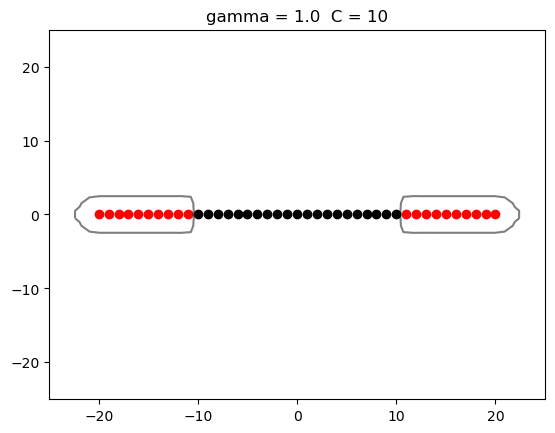

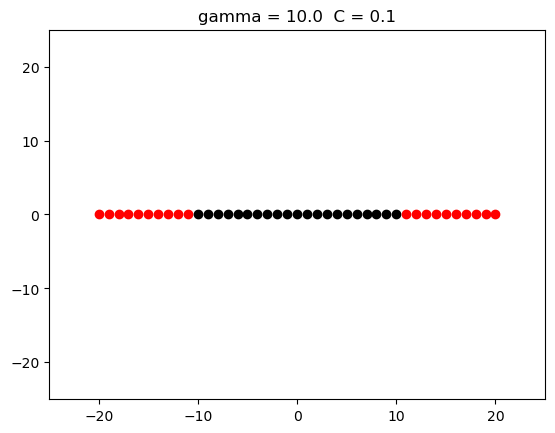

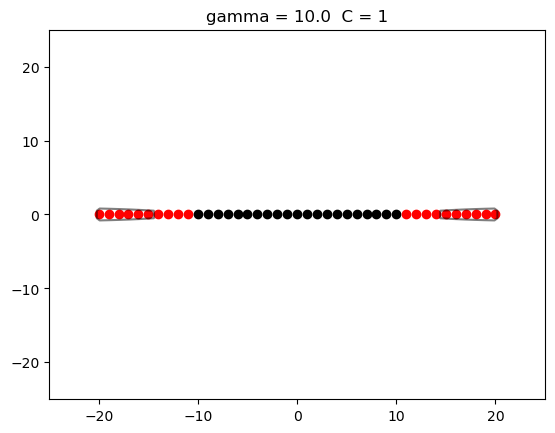

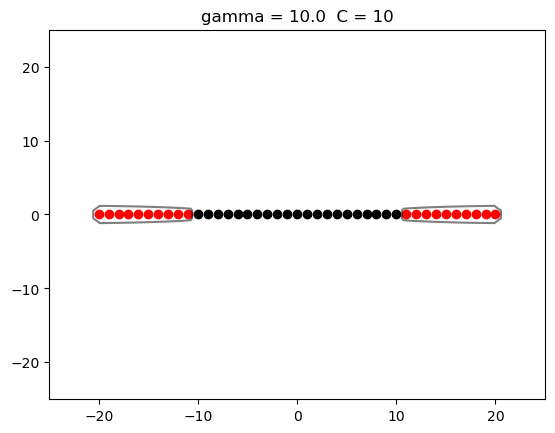

In [8]:
xx = np.linspace(np.floor(temp[:, 0].min()-5),
                 np.ceil(temp[:, 0].max())+5)
yy = np.linspace(np.floor(temp[:, 0].min()-5),
                 np.ceil(temp[:, 0].max())+5)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
for k, (c, g, svm) in enumerate(classifiers):
    Z = svm.decision_function(xy).reshape(XX.shape)
    for i in range(len(temp[:, 0])):
        plt.scatter(x= temp[i, 0], y= temp[i, 1], color= mapping[temp[i, 2]])
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(f'gamma = {g}  C = {c}')
    plt.show()